# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:\MOD5_Plotting\Mouse_metadata.csv"
study_results_path = "C:\MOD5_Plotting\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data=pd.merge(study_results,mouse_metadata)

# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
mouse_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [3]:
# Checking the number of mice.
mice_count = len(mouse_data["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint_duplicate=mouse_data[mouse_data[['Timepoint','Mouse ID']].duplicated()]
timepoint_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=mouse_data.loc[mouse_data["Mouse ID"]=='g989']
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cl_mouse_data_df = mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == 'g989'].index)


In [7]:
# Checking the number of mice in the clean DataFrame.
cl_mouse_data_count= len(cl_mouse_data_df["Mouse ID"].unique())
cl_mouse_data_count

248

## Summary Statistics

In [8]:
cl_mouse_data_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#i looked back at our pandas assignemnt to create this dataframe and i googled the .var().std().sem() methods
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Drugs_mean=cl_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drugs_median=cl_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drugs_Var=cl_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drugs_Std=cl_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drugs_Serr=cl_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_Summary=pd.DataFrame({"Mean Tumor Volume":Drugs_mean,
                                  "Median Tumor Volume":Drugs_median,
                                  "Tumor Volume Variance":Drugs_Var,
                                  "Tumor Volume Std. Dev.":Drugs_Std,
                                  "Tumor Volume Std. Err.":Drugs_Serr})

Drug_Regimen_Summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat=cl_mouse_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var', 'std', 'sem']})
summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [25]:
MouseID_TP_Drugs=cl_mouse_data_df["Drug Regimen"].value_counts()
MouseID_TP_Drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

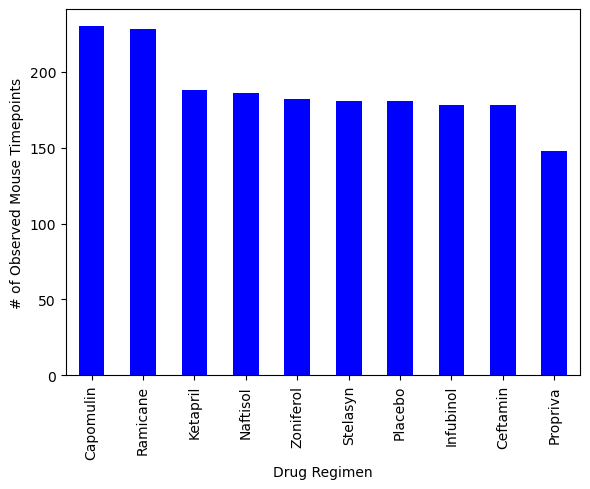

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_with_Pandas=MouseID_TP_Drugs.plot(kind="bar", facecolor="blue", figsize=(6,5),
                                     xlabel="Drug Regimen",
                                     ylabel="# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

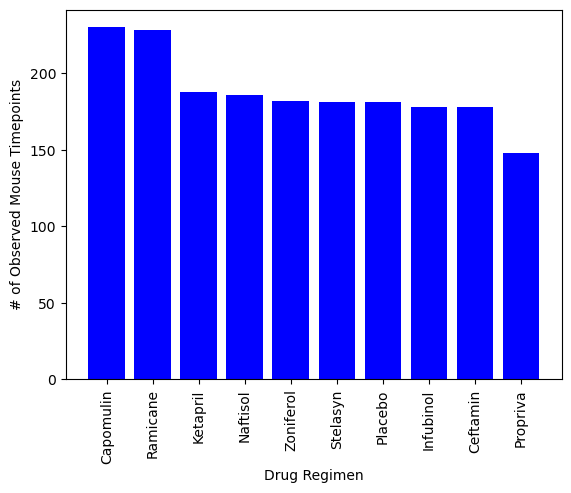

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#i had places the numbers around single quotatin marks and that inverted the bars
drug_name=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva']
tp_for_mouse=[230,228,188,186,182,181,181,178,178,148]

plt.bar(drug_name, tp_for_mouse, color='b',align="center")
plt.xticks(drug_name, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [28]:
Female_Male=cl_mouse_data_df["Sex"].value_counts()
Female_Male

Sex
Male      958
Female    922
Name: count, dtype: int64

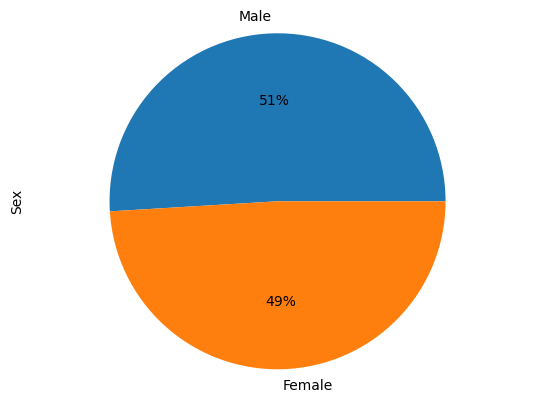

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_with_Pandas=Female_Male.plot(kind="pie",autopct='%1.0f%%')
pie_with_Pandas.set_ylabel("Sex")
plt.axis("equal")
plt.show()

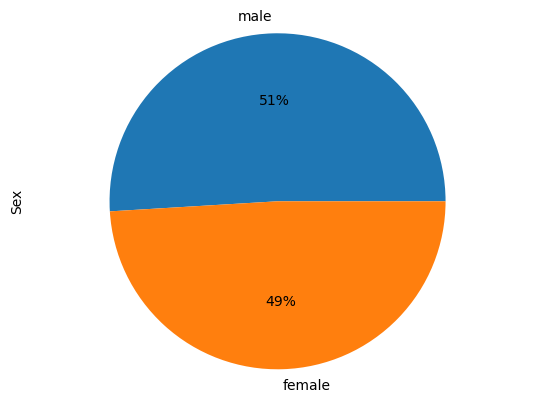

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["male","female"]
amount=[958,922]


plt.ylabel("Sex")
plt.pie(amount, labels=sex, autopct='%1.0f%%')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Instruction:Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Instruction: Start by getting the last (greatest) timepoint for each mouse
per_mouse=cl_mouse_data_df.groupby(["Mouse ID"])['Timepoint'].max()
per_mouse
# per_mouse=cl_mouse_data_df.groupby("Mouse ID").aggregate({"Timepoint":'max'})
# per_mouse
per_mouse = per_mouse.reset_index()
#Instruction: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# greatest_TP_per_mouse_df=pd.DataFrame({"Greatest Timepoint":per_mouse})
# greatest_TP_per_mouse_df

cl_complete_mouse_data_df=per_mouse.merge(cl_mouse_data_df,on=['Mouse ID','Timepoint'],how="left")
cl_complete_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

Treatment=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
    

for T in Treatment:
    Selected_Drugs=cl_complete_mouse_data_df[(cl_complete_mouse_data_df["Drug Regimen"]==T)]['Tumor Volume (mm3)']
    tumor_vol.append(Selected_Drugs)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=Selected_Drugs.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
    
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


C:\Users\judit\AppData\Local\Temp\ipykernel_27272\424669461.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Treatment)


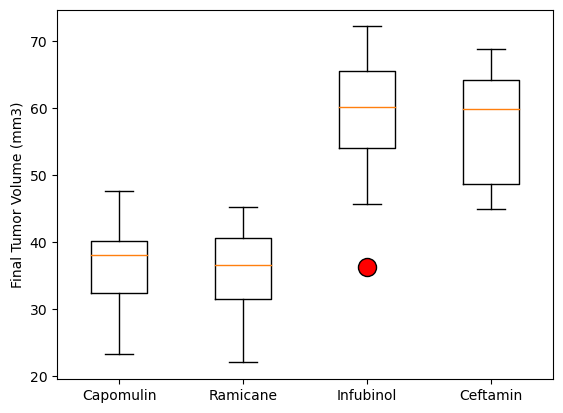

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(Treatment)
ax1.boxplot(tumor_vol, flierprops=dict(marker="o", markersize=13, markerfacecolor="r"))
plt.show()

## Line and Scatter Plots

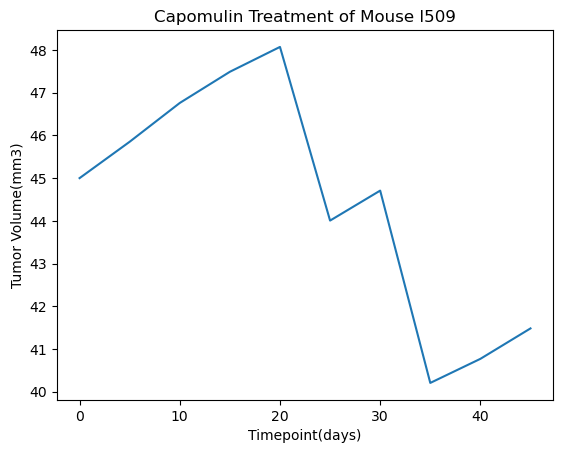

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_mouse=cl_mouse_data_df.loc[cl_mouse_data_df["Drug Regimen"]=='Capomulin']
Capomulin_mouse

I509_Mouse=Capomulin_mouse.loc[Capomulin_mouse["Mouse ID"]=='l509']
I509_Mouse



plt.plot(I509_Mouse['Timepoint'], I509_Mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()



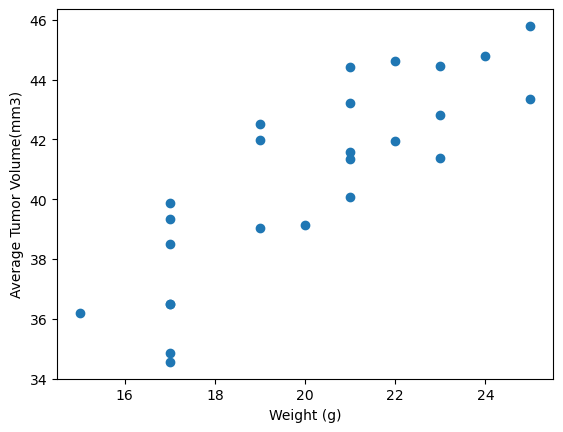

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_mouse=cl_mouse_data_df.loc[cl_mouse_data_df["Drug Regimen"]=='Capomulin']
Capomulin_mouse

Mouse_Weight=Capomulin_mouse.groupby("Mouse ID")["Weight (g)"].unique()
# Mouse_Weight

Cap_TumorVol_mean=Capomulin_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
# Cap_TumorVol_mean

plt.scatter(Mouse_Weight,Cap_TumorVol_mean)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model 
corr= st.pearsonr(Mouse_Weight,Cap_TumorVol_mean)
corr

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

PearsonRResult(statistic=array([0.84116671]), pvalue=array([1.39298626e-07]))

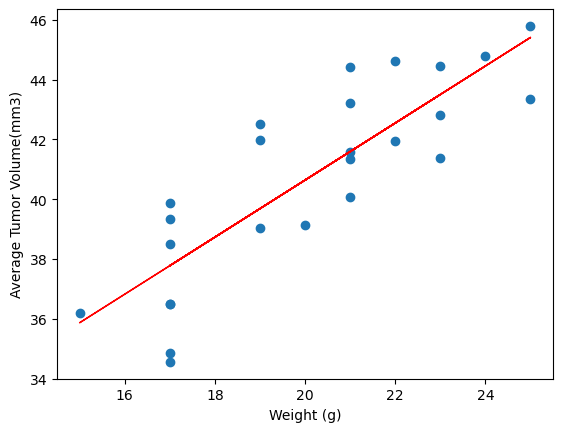

In [24]:
Mouse_Weight=Capomulin_mouse.groupby("Mouse ID")["Weight (g)"].unique()
Cap_TumorVol_mean=Capomulin_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

slope, intercept,r,p,std=st.linregress(Mouse_Weight.astype(float),Cap_TumorVol_mean)
line= slope*Mouse_Weight+intercept

plt.scatter(Mouse_Weight,Cap_TumorVol_mean)
plt.plot(Mouse_Weight,line,'r',linewidth=1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()
